In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


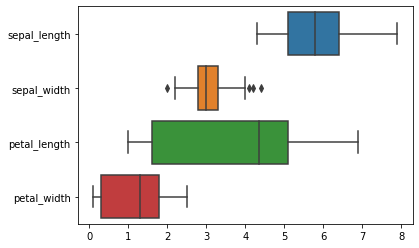

In [5]:
sns.boxplot(data = df, orient = "h")
plt.show()


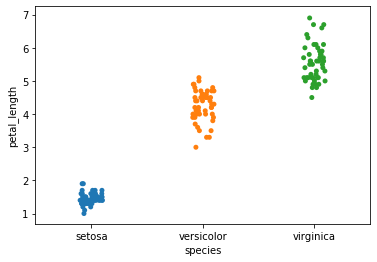

In [6]:
#stripplot()、swarmplot()等的圖。
sns.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

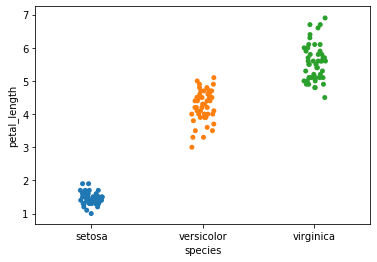

In [7]:
#stripplot()、swarmplot()等的圖。
sns.stripplot(x = "species", y = "petal_length", data = df,jitter=True)#jitter=True 加入抖動 避免重疊
plt.show()

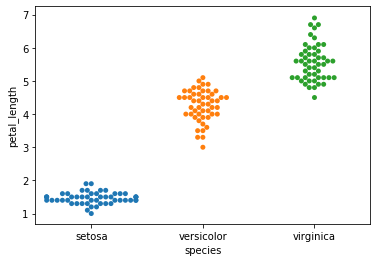

In [8]:
#使用swarmplot 從而避免重疊點 
sns.swarmplot(x='species',y='petal_length',data=df)

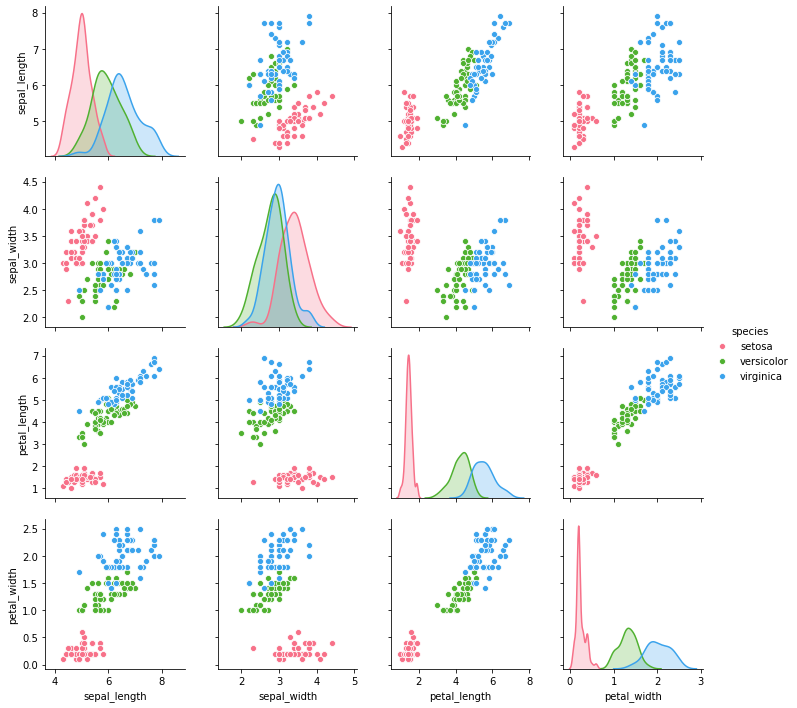

In [9]:
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

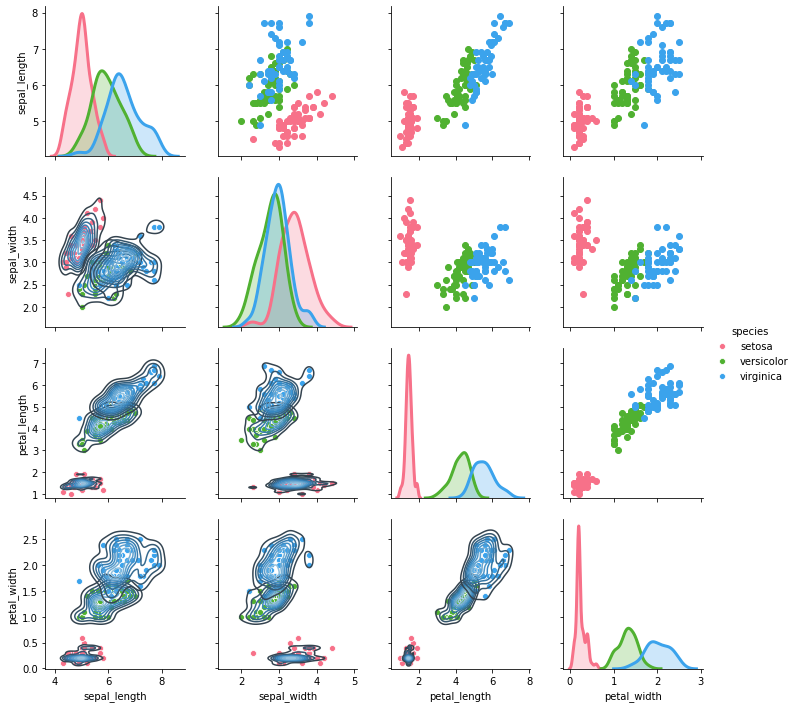

In [10]:
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
#diag_kind = 'auto', 'hist', 'kde'
g.map_upper(plt.scatter)#上半三角形
g.map_lower(sns.kdeplot, cmap = "Blues_d")#下半三角形
g.map_diag(sns.kdeplot, lw = 3, legend = False);
plt.show()

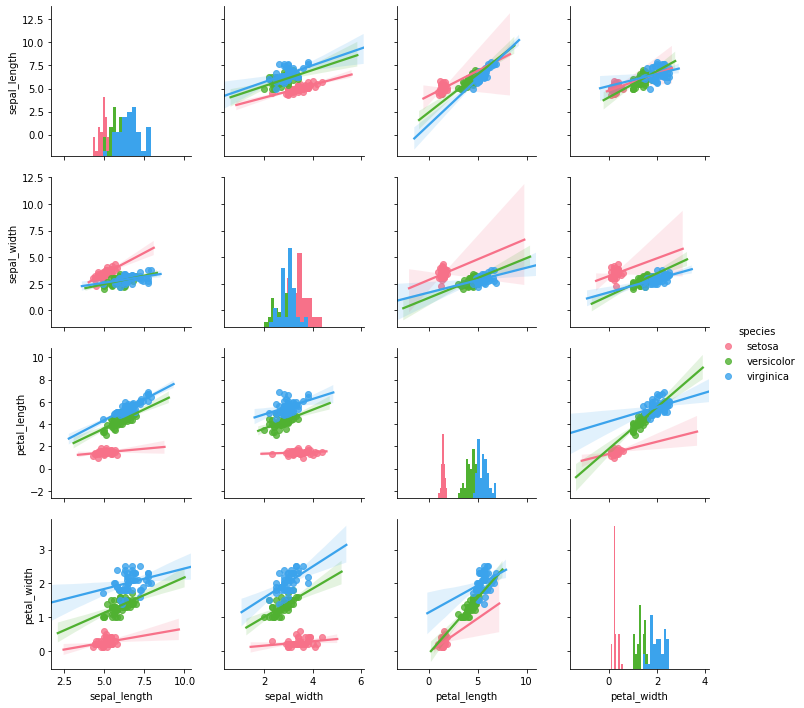

In [11]:
g = sns.pairplot(df,hue = 'species',diag_kind = "hist",kind = "reg",palette = "husl")#regression
#kind = {'scatter', 'reg'}
#diag_kind = {'auto', 'hist', 'kde'}

# HW

In [12]:
#取得另一個 dataset：titanic
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


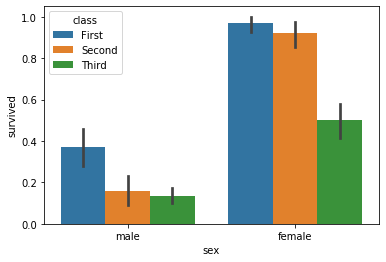

In [13]:
#sex vs pclassa
sns.barplot(x = "sex", y = "survived", hue = "class", data = data)
plt.show()

In [14]:
#各個艙等 存活人數
data.groupby('pclass').survived.sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

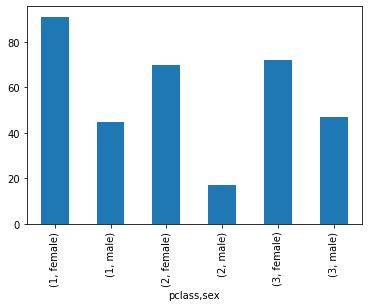

In [15]:
#加上性別
survived=data.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')

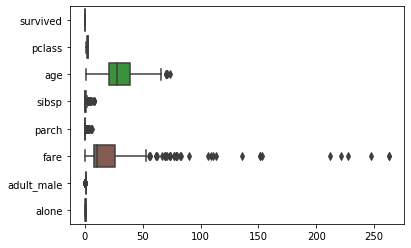

In [16]:
#做箱形圖
sns.boxplot(data = data[data['survived']==0], orient = "h")

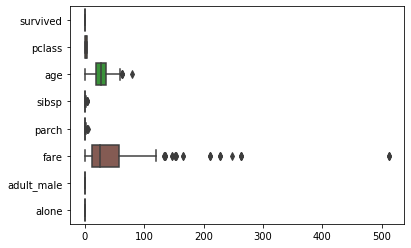

In [17]:
sns.boxplot(data = data[data['survived']==1], orient = "h")

In [18]:
#利用 facet grid 繪圖並分析
#crosstab
survived_counts = pd.crosstab([data.pclass, data.sex],data.survived) #(x index,y index)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


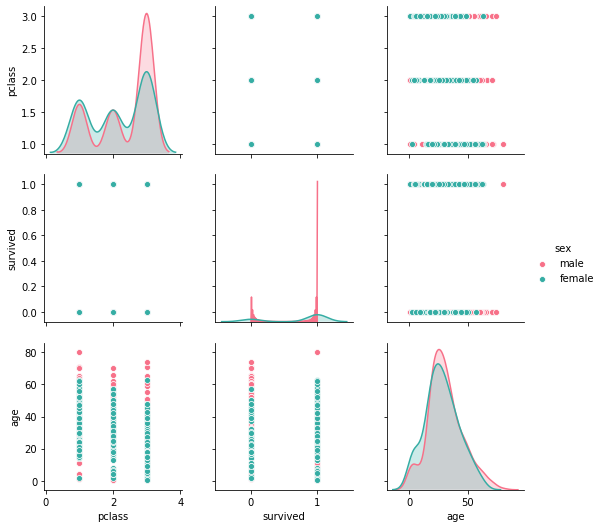

In [19]:
sns.pairplot(data[['pclass','sex','survived','age']],hue='sex',diag_kind = "kde",kind = "scatter",palette = "husl")
#class 3 男性較女性多

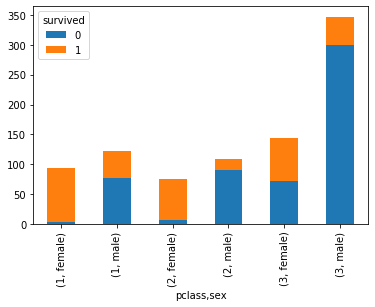

In [20]:
survived_counts.plot(kind='bar',stacked=True)
#女性存活率較男性高

In [21]:
data['sex']=data['sex'].apply(lambda x: 1 if x=='male' else 0)

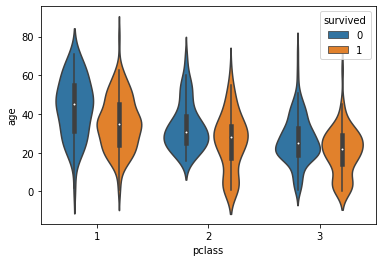

In [22]:
#繪製小提琴圖
sns.violinplot(data=data,x='pclass',y='age',hue='survived')

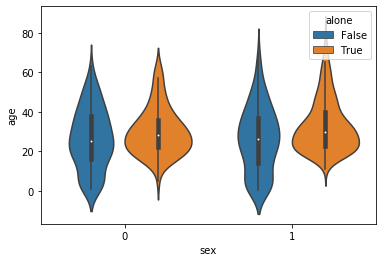

In [23]:
sns.violinplot(data=data,x='sex',y='age',hue='alone')